In [8]:
import pandas as pd

import datetime

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

#!pip install yfinance

import yfinance as yf

%matplotlib inline

In [2]:
yndx = pd.read_csv('YNDX_180101_211231.csv')
vtbr = pd.read_csv('VTBR_180101_211231.csv')
sber = pd.read_csv('SBER_180101_211231.csv')
rosn = pd.read_csv('ROSN_180101_211231.csv')
gazp = pd.read_csv('GAZP_180101_211231.csv')

In [3]:
yndx

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,YNDX,10,20180103,10:10:00,1920.0,1927.0,1915.0,1917.0,2201
1,YNDX,10,20180103,10:20:00,1917.0,1925.5,1917.0,1919.0,626
2,YNDX,10,20180103,10:30:00,1918.5,1922.0,1918.5,1922.0,114
3,YNDX,10,20180103,10:40:00,1923.5,1924.0,1920.5,1924.0,325
4,YNDX,10,20180103,10:50:00,1924.0,1927.0,1923.0,1923.0,145
...,...,...,...,...,...,...,...,...,...
65213,YNDX,10,20211230,23:10:00,4563.0,4570.2,4555.4,4568.6,4781
65214,YNDX,10,20211230,23:20:00,4567.2,4569.0,4562.4,4567.8,1900
65215,YNDX,10,20211230,23:30:00,4564.2,4580.0,4562.6,4576.0,5070
65216,YNDX,10,20211230,23:40:00,4576.0,4580.2,4570.0,4576.0,6586


# Новости про Яндекс

### сообщение в 10:05

яндекс

аналитики втб капитал повысили справедливую цену по акциям яндекс, рекомендация покупать.

✅ цель: 100 $ (~ 7180 руб.)
⏰ срок: 12 месяцев

причины роста:

- компания повысила свой прогноз по выручке за 2021 г.

- прогнозируемый рост операционной прибыли составит 125% в 2022 г.

- ожидаемый рост рентабельности операционной прибыли составит 4 п.п. в 2022 г.

- сильный денежный поток от поискового бизнеса позволяет компании инвестировать в развитие экосистемы: яндекс.лавка, яндекс.еда и т. д.

$yndx

### Сообщение в 12:10

"🎸 уличный музыкант и миллионер 

новый победитель #миллионыдомастинькофф — 30-летний музыкант из самары андрей макаров с ником в пульсе impulsandrey. 

андрей — профессиональный уличный музыкант. когда наступают холода, играет в барах, на вечеринках и онлайн. например, сегодня будет петь серенаду по заказу влюбленного. 

первый опыт инвестиций андрея связан с рынком валют — он пытался заработать на forex, но, естественно, погорел. год назад увлекся трейдингом на фондовой бирже. положил 90 тыс. рублей на счет и стал активно покупать и продавать акции, используя маржинальную торговлю. однако очень скоро на счету осталось лишь 50 тыс. рублей, которые андрей потратил на музыкальное оборудование.

сейчас андрей решил стать долгосрочным инвестором и покупать фонды тинькофф. специально ради участия в нашей акции вчера приобрел акции медицинской компании hologic — они просели и, по мнению андрея, имеют шансы на рост. однако выигрыш он планирует вложить только в фонды — так надежнее. впрочем, несмотря на решение инвестировать вдолгую андрей продолжает часто продавать и покупать паи, благо это можно сделать без комиссии. «включается азарт, не могу удержаться», — сетует андрей и рассчитывает выиграть еще миллион по акции с фондами. 
 
худшая сделка андрея — это покупка с плечом акций «яндекса» в прошлом году. сразу после сделки они пошли вниз, в итоге артист потерял 20 тыс. руб. 

лучшая — покупка tesla, когда ему удалось заработать 10 тыс. рублей за 10 минут.  

мы поздравляем победителя и напоминаем, что акция #миллионыдомастинькофф продолжается — каждый день, когда открыта хотя бы одна биржа, мы разыгрываем по миллиону рублей. 
• покупайте ценные бумаги от 5000 рублей (кроме фондов, тут у нас другая акция станьте миллионером с тинькофф), 
• выкладывайте в соцсети свои покупки с хештегом #миллионыдомастинькофф 
• участвуйте в розыгрыше. 

все согласованные с юристами правила есть тут, а здесь видео розыгрыша. 

#миллионыдомастинькофф"

In [18]:
yndx['<DATE>'].value_counts()

20211230    100
20211217    100
20211206    100
20211207    100
20211208    100
           ... 
20180112     52
20180122     52
20180111     50
20180410     48
20200508     48
Name: <DATE>, Length: 1011, dtype: int64

In [32]:
df_1 = yndx[yndx['<DATE>']==20211105]

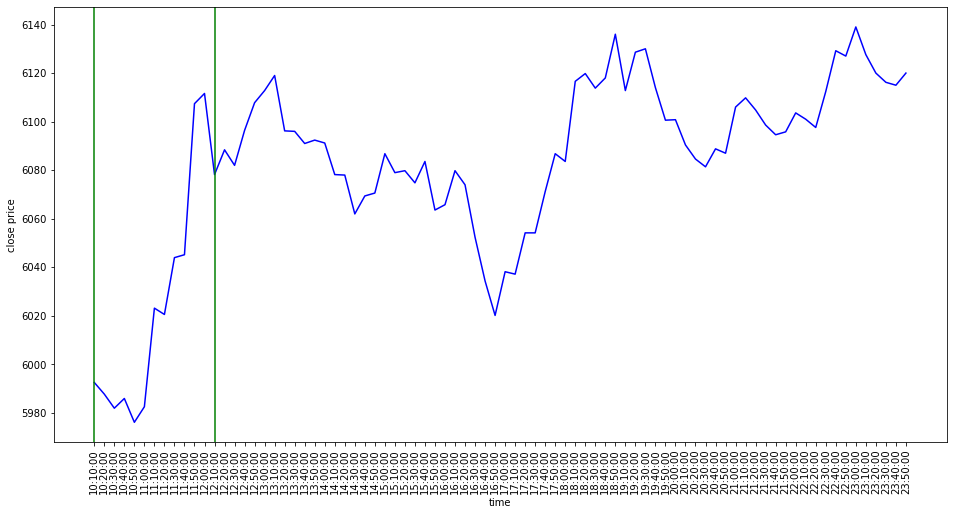

In [76]:
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
ax = sns.lineplot(x = '<TIME>', y = '<CLOSE>', 
              data = df_1, 
              color = 'blue')
ax.set(xlabel='time', ylabel='close price')
ax.tick_params(axis='x', rotation=90)
plt.axvline('10:10:00', 0,max(df_1['<CLOSE>']), color = 'green')
plt.axvline('12:10:00', 0,max(df_1['<CLOSE>']), color = 'green')

In [ ]:
### Сообщение 24.08 в 15:49

"🏁 итоги дня, 24.08
 
📊 полюс – результаты в рамках ожиданий за 2 кв. 2021 г. позитивно: незначительный рост денежных затрат на унцию, $390/oz, что ниже прогнозов компании $425-450/oz по итогам 2021г. совет директоров рекомендовал дивиденды за 2 кв.: 267,48 руб/акция, доходность 2%.
 
🌐 яндекс: планирует выйти в fashion-сегмент электронной коммерции до конца 2021 г. сейчас доля сегмента в обороте яндекс.маркета 1%, планы нарастить обороты до 20% за 1-2 года. доля яндекс.маркета в выручке компании сейчас 4%.
 
🛢 роснефть – совет директоров ожидаемо рекомендовал рекордные промежуточные дивиденды 18,03 руб./акцию. дивидендная доходность за 1 полугодие 3,3%.
 
$plzl $yndx $rosn"

In [41]:
df_2 = yndx[yndx['<DATE>']==20210824]

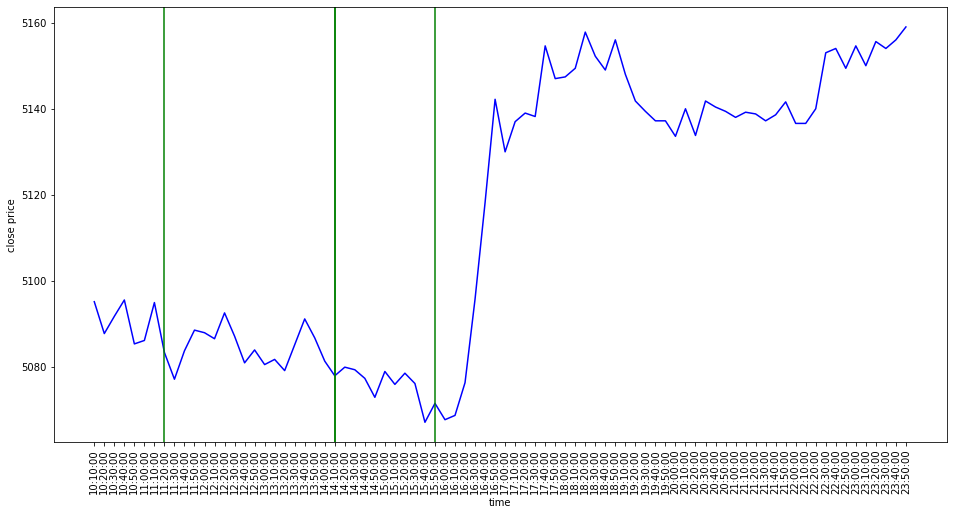

In [77]:
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
ax = sns.lineplot(x = '<TIME>', y = '<CLOSE>', 
              data = df_2, 
              color = 'blue')
ax.set(xlabel='time', ylabel='close price')
ax.tick_params(axis='x', rotation=90)
plt.axvline('15:50:00', 0,max(df_1['<CLOSE>']), color = 'green')
ax.tick_params(axis='x', rotation=90)
plt.axvline('14:10:00', 0,max(df_1['<CLOSE>']), color = 'green')
ax.tick_params(axis='x', rotation=90)
plt.axvline('11:20:00', 0,max(df_1['<CLOSE>']), color = 'green')
ax.tick_params(axis='x', rotation=90)
plt.axvline('14:10:00', 0,max(df_1['<CLOSE>']), color = 'green')

### 1.07.2021

"🏁 итоги дня, 01.07
 
🔵 газпром — входит в топ 10 россии — добыча газа в первом полугодии 2021 г. + 18% г/г. экспорт в дальнее зарубежье +26% г/г. для компании позитивно снижение запасов в европе и рост цен на газ из-за жары.
 
⚡️ русгидро — входит в топ 10 россии — акционеры утвердили дивиденды по итогам 2020 г. выплаты ожидаемо составят 0,053 руб./акция, доходность 6%. закрытие реестра 10 июля.
 
📄 президент подписал закон, обязывающий крупные it компании иметь представительства в рф. регулирование ужесточается, если кто-то из зарубежных компаний не будет исполнять новые требования — будет позитивно для яндекса и mail.ru.
 
⛽️ татнефть — гендиректор заявил, что компания может рассмотреть покупку нпз «таиф-нк». мы с осторожностью смотрим на акции татнефти в связи с возможной сделкой.

$gazp $hydr $yndx $mail $tatn"

In [46]:
df_3 = yndx[yndx['<DATE>']==20210701]
df_4 = gazp[gazp['<DATE>']==20210701]

Text(0.5, 1.0, 'яндекс')

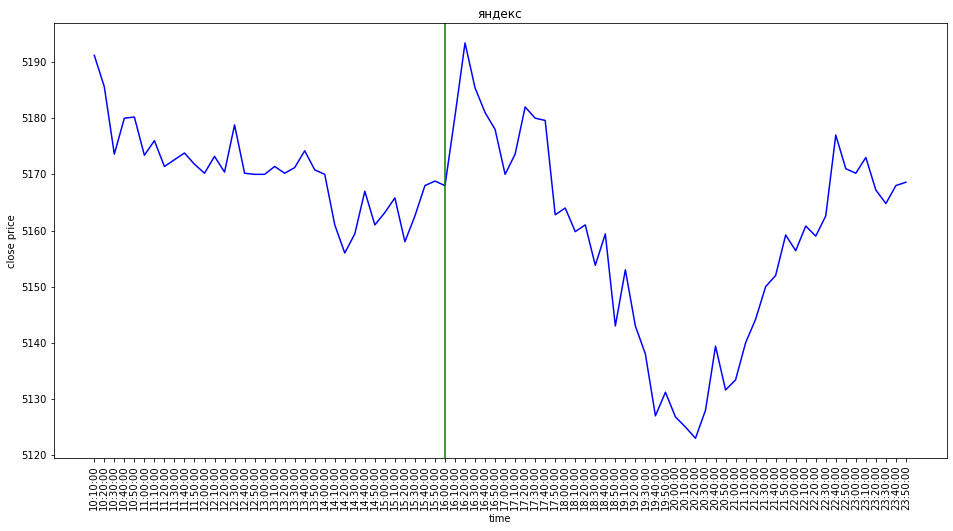

In [78]:
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
ax = sns.lineplot(x = '<TIME>', y = '<CLOSE>', 
              data = df_3, 
              color = 'blue')

ax.set(xlabel='time', ylabel='close price')
ax.tick_params(axis='x', rotation=90)
plt.axvline('16:00:00', 0,max(df_1['<CLOSE>']), color = 'green')
plt.title('яндекс')

Text(0.5, 1.0, 'газпром')

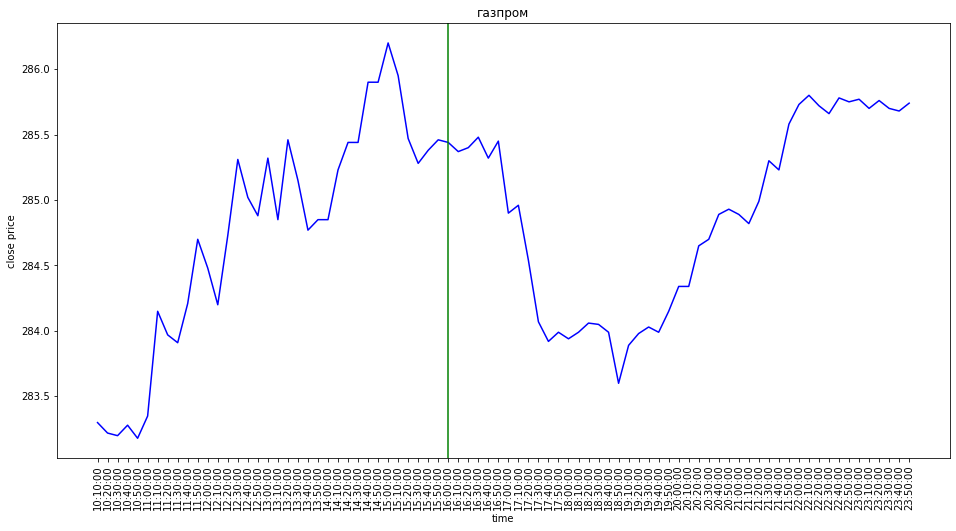

In [81]:
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
ax = sns.lineplot(x = '<TIME>', y = '<CLOSE>', 
              data = df_4, 
              color = 'blue')

ax.set(xlabel='time', ylabel='close price')
ax.tick_params(axis='x', rotation=90)
plt.axvline('16:00:00', 0,max(df_1['<CLOSE>']),  color = 'green')
plt.title('газпром')

### 27.05.2021 13:07

"аналитики втб капитал повысили справедливую оценку акций яндекса на 3%, рекомендацию покупать.

прогноз: 90 $ (~6600 руб.)
срок: 12 месяцев

причины роста:

🔹лидерство на конкурентных рынках. интернет-поиск и такси — два огромных рынка, на которых компания является лидером, несмотря на жёсткую конкуренцию со стороны глобальных игроков. лидирующие позиции также в каршеринге, доставке еды, интернет-торговле продуктами питания. яндекс.плюс — самый популярный сервис подписки в стране, который подчёркивает привлекательность экосистемы компании для пользователей.

🔹прибыльность. многие бизнесы уже являются прибыльными или приближаются к этому. рентабельность ebitda яндекс.такси около 40% — самая высокая в мире в этом секторе.

🔹e-commerce — новый ключевой бизнес. яндекс.маркет уже предлагает одни из самых низких цен для покупателей, а также комиссий для продавцов. дальнейшее развитие логитической и it-инфраструктуры усилит позиции яндекс.маркета как платформы «первого выбора», позволит нарастить долю рынка. 

#yndx"

In [57]:
df_5 = yndx[yndx['<DATE>']==20210527]

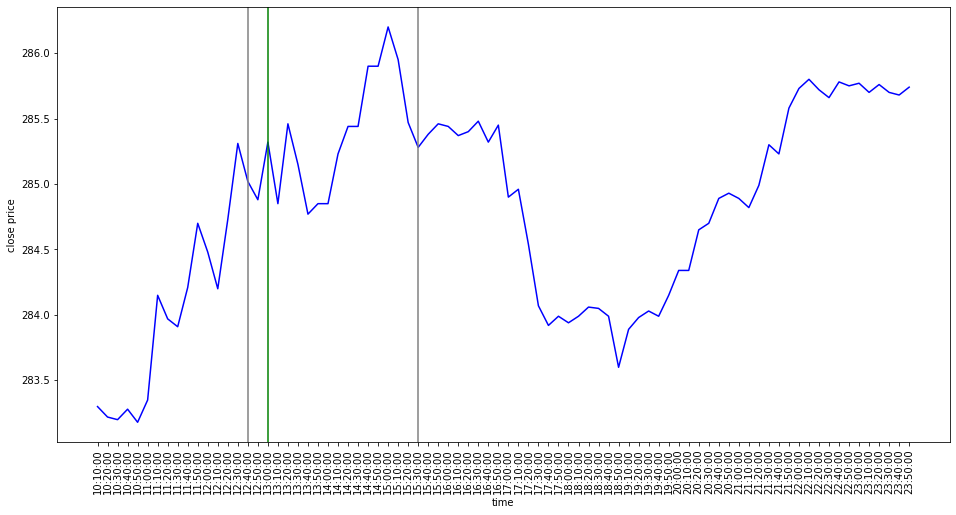

In [95]:
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
ax = sns.lineplot(x = '<TIME>', y = '<CLOSE>', 
              data = df_4, 
              color = 'blue')

ax.set(xlabel='time', ylabel='close price')
ax.tick_params(axis='x', rotation=90)
plt.axvline('13:00:00', 0,max(df_1['<CLOSE>']), color = 'green')
plt.axvline('12:40:00', 0,max(df_1['<CLOSE>']), color = 'grey')
plt.axvline('15:30:00', 0,max(df_1['<CLOSE>']), color = 'grey')

# Газпром

In [90]:
df_6 = gazp[gazp['<DATE>']==20211129]

"🏁 итоги дня, 29.11.

📉 «норникель» увеличил прогноз капитальных затрат до 2030 г. на 16%. менеджмент предложил дивидендную формулу 50-75% от чистого денежного потока начиная с 2022г. это означает, что дивидендная доходность может упасть до 5-8% против 10-11% сейчас.

🏗 «самолёт» планирует в 2022 году удвоить операционную прибыль и дивиденды акционерам. это выше того, что было заложено в наших прогнозах.

🔵 «газпром» — чистая прибыль +10,3% кв/кв. превысила консенсус-прогноз. менеджмент ожидает рекордные дивиденды по итогам 2021 года. по нашим прогнозам, дивдоходность за 2021г. составит 13,7%, которая еще не полностью учтена в стоимости акций.

$gmkn $smlt $gazp"

"​​🟢 итоги дня. отчётность газпрома, татнефти и аэрофлота

мировые фондовые индексы восстанавливаются после сильнейшего падения в пятницу. рынок переоценил опасность нового штамма коронавируса. воз потребуется несколько недель, чтобы оценить последствия от его появления. индекс мосбиржи сегодня вырос на 3% (на 17:00 мск).

🌀 как следует из отчётности газпрома, за девять месяцев 2021 года чистая прибыль компании составила 1,55 трлн руб. (против чистого убытка 202 млрд руб. за девять месяцев 2020 года), а выручка — 6,73 трлн руб., увеличившись с 4,3 трлн руб. за аналогичный период прошлого года. менеджмент отметил рекордные результаты, в том числе снижение долговой нагрузки: отношение чистого долга к ebitda снизилось до 1,2. руководство также ожидает двузначной дивидендной доходности по итогам года.


$gazp $tatn $aflt"

### В период с 13-15 часов очень много каналов выкладывала информацию по отчетности и прогнозам по газпрому (информация положительая)

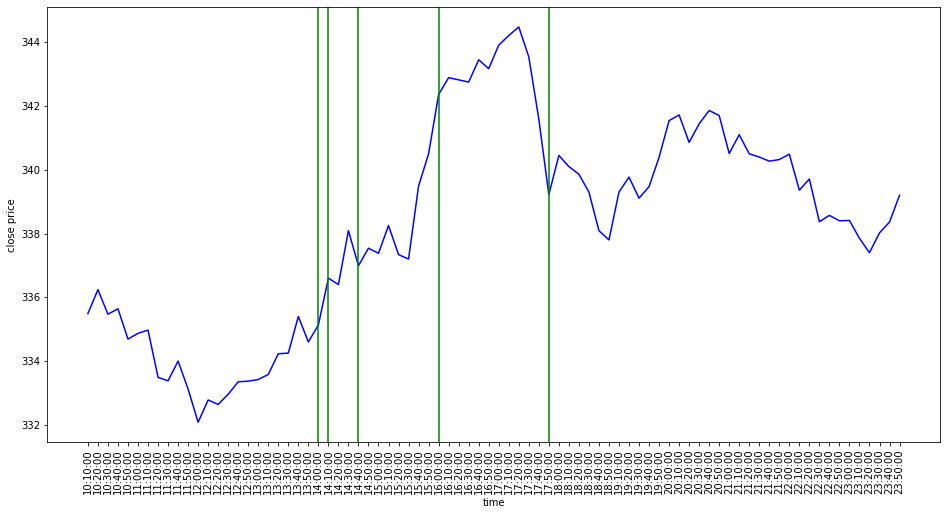

In [91]:
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
ax = sns.lineplot(x = '<TIME>', y = '<CLOSE>', 
              data = df_6, 
              color = 'blue')

ax.set(xlabel='time', ylabel='close price')
ax.tick_params(axis='x', rotation=90)
plt.axvline('17:50:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('16:00:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('14:00:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('14:10:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('14:40:00', 0,max(df_6['<CLOSE>']), color = 'green')

### 17 сентября

📈 рост цен на газ в европе (+40% в сентябре) поддерживает интерес к акциям газпрома и новатэка. однако долгое сохранение столь высоких цен приведёт к замедлению темпов восстановления экономики ес. европейские производители  азотных удобрений уже сокращают производство.


>Новость в 15:46 (негативная)

"группа депутатов европарламента обратилась в еврокомиссию с ходатайством о начале антимонопольного расследования против «газпрома» в связи с ситуацией на газовом рынке ес, где цены взлетели на 300% с начала года.
40 европарламентариев из польши и стран балтии призывают расследовать действия «газпрома» на предмет нарушения антимонопольного законодательства. @banksta"

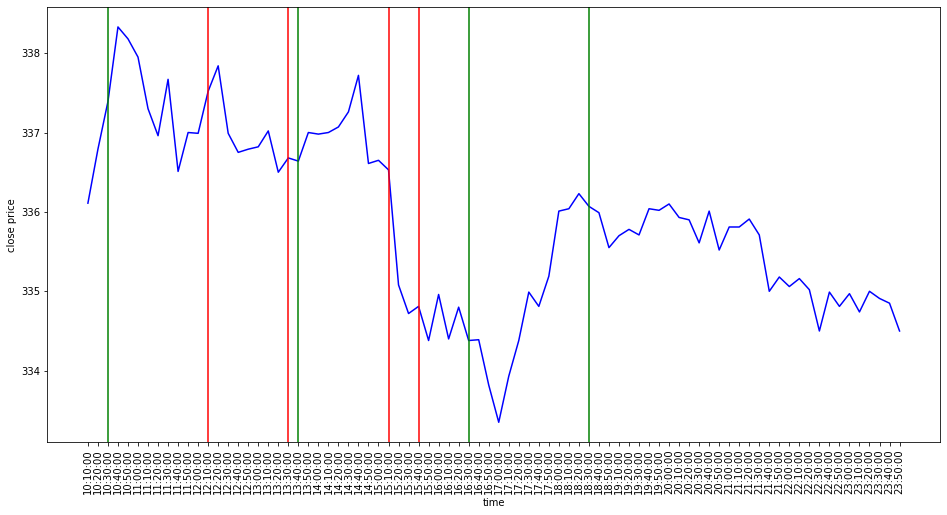

In [93]:
df_7  = gazp[gazp['<DATE>']==20210917]
fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
ax = sns.lineplot(x = '<TIME>', y = '<CLOSE>', 
              data = df_7, 
              color = 'blue')

ax.set(xlabel='time', ylabel='close price')
ax.tick_params(axis='x', rotation=90)

plt.axvline('16:30:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('13:40:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('15:40:00', 0,max(df_6['<CLOSE>']), color = 'red')
plt.axvline('12:10:00', 0,max(df_6['<CLOSE>']), color = 'red')
plt.axvline('10:30:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('18:30:00', 0,max(df_6['<CLOSE>']), color = 'green')
plt.axvline('15:10:00', 0,max(df_6['<CLOSE>']), color = 'red')
plt.axvline('13:30:00', 0,max(df_6['<CLOSE>']), color = 'red')

In [ ]:
df_8  = sber[sber['<DATE>']==20210917]